In [1]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('cleaned_data.csv')

#### Subsetting 3: Area Graphs

In [3]:
df1 = df[['State Id', 'EmpName', 'JobTitle', 'ExitDate', 'Year']]

In [4]:
df1 = df1.sort_values(by=['Year', 'State Id', 'ExitDate'], ascending = (True, True, False))

In [5]:
df1 = df1.drop_duplicates(subset = ['State Id'], keep='first')

#### Are Graph 1: Total Number by Employer

In [7]:
df2 = df1[['Year', 'EmpName', 'State Id']].groupby(['Year', 'EmpName']).count()

In [8]:
df2

State Id
Year EmpName                                      
2018 0                                           1
     1st Choice Staffing Agency                  1
     ALBERTSONS COMPANIES, INC.                  1
     AMAZON.COM INC                              1
     ARAMARK                                     1
...                                            ...
2021 Dynamic Concepts Inc                        2
     Fema                                        1
     Pepco Holdings, Inc.                        5
     Utility Lines Construction Services         1
     WDC Solar                                   1

[376 rows x 1 columns]

In [9]:
df2 = df2.reset_index()
df2 = df2.rename(columns = {"State Id": "Number Employed"})

In [10]:
df2_long = df2.pivot_table(index='Year', columns='EmpName', values='Number Employed').reset_index()

In [11]:
df2_long = df2_long.fillna(0)

In [12]:
df2_long = df2_long.set_index('Year')

In [13]:
df2_long

EmpName,0,1st Choice Staffing Agency,"22nd Century Technologies, Inc.",22nd Century Technology,"ALBERTSONS COMPANIES, INC.",AMAZON.COM INC,ARAMARK,ARAMARK Food & Support Svc.,AT YOUR SERVICE DC,Access Demolition Contracting Inc.,...,Zeta Phi Beta Sorority,herwin-Williams Commercial Paint Store,istrict Dept. of Transportation (DDOT),lowe's,oasis,oasis group holdings inc,positive construction,sodexho,stohlman volkswagen subarun Tyson's corner,utiliquest
Year,,,,,,,,,,,,,,,,,,,,,
2018,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,3.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
2019,1.0,0.0,1.0,2.0,0.0,0.0,1.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


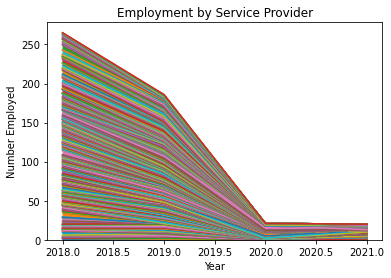

In [23]:
## comparing service providers
df2_long.plot(kind='area', legend=None)
plt.title('Employment by Service Provider')
plt.ylabel('Number Employed')
plt.xlabel('Year')
plt.savefig('line_graph.png', dpi=300, bbox_inches='tight')
plt.show()

In [18]:
df2_long.to_csv('df2_long.csv')